In [2]:
import numpy as np
import pandas as pd
from utils import *

font_setting()
cmap = plt.get_cmap("viridis")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
### probrem setting
# os
log_dir = "./log/matching/"
log_dir2 = "./log/obs_stars/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]


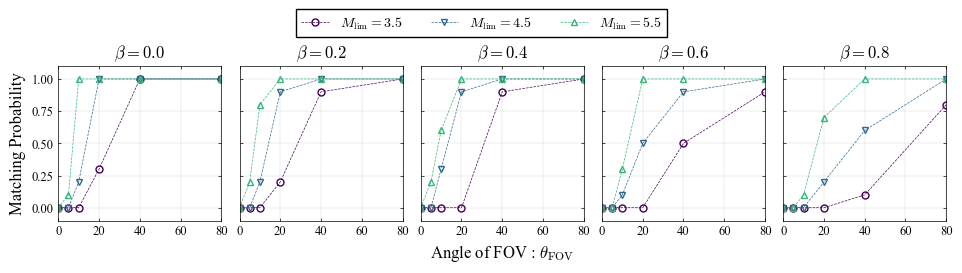

In [4]:
fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(4.8*2, 2.5), dpi=100)

axes[2].set_xlabel("Angle of FOV : $\\theta_{\\mathrm{FOV}}$")
axes[0].set_ylabel('Matching Probability')
axes[0].set_xlim(0, 80)
axes[0].set_ylim(-0.1, 1.1)

markers = ["o", "v", "^"]
kwargs = {"ls": "dashed", "lw": 0.5, "markersize": 5, "markerfacecolor":'none'}

for ii, beta in enumerate(beta_list):
    ax = axes[ii]
    for i, M_lim in enumerate(M_lim_list):
        p = []
        for j, theta_FOV in enumerate(theta_FOV_list):
            path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
            df = pd.read_csv(path)
            prob = sum(df["unique"]*df["included"])/len(df)
            p.append(prob)
        kwargs.update({"color": cmap(i/len(M_lim_list)), "marker": markers[i], "label": "$M_{\\mathrm{lim}}=$"+f"${M_lim}$"})
        ax.plot([0]+theta_FOV_list, [0]+p, **kwargs)
    # ax.legend()
    ax.set_title( "$\\beta=$"+f"${beta}$")

lines_labels = [axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.02), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/matching_prob.pdf", bbox_inches='tight')

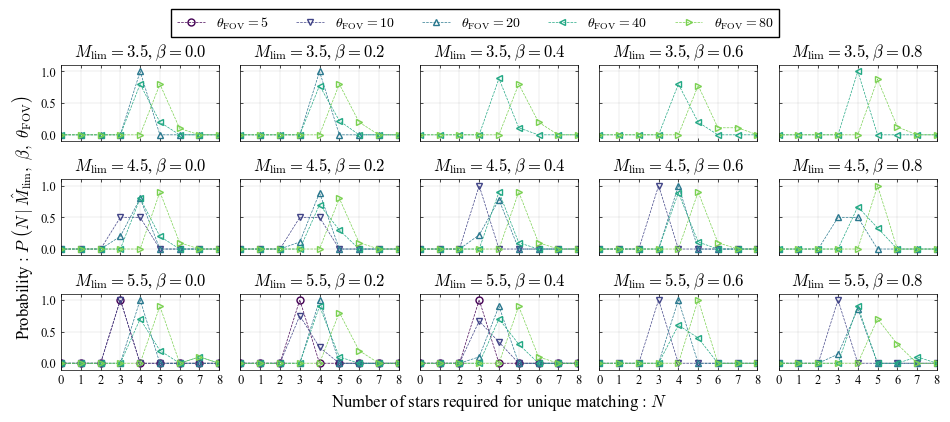

In [25]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Number of stars required for unique matching : $N$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(0, 8)
axes[0, 0].set_ylim(-0.1, 1.1)
axes[0, 0].set_xticks(list(range(0, 9))) 
axes[0, 0].set_xticklabels(list(range(0, 9)))

markers = ["o", "v", "^", "<", ">"]
kwargs = {"ls": "dashed", "lw": 0.5, "markersize": 5, "markerfacecolor":'none'}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = None if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        ax.plot(range(len(dens)), dens, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = None if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        ax.plot(range(len(dens)), dens, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = None if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        ax.plot(range(len(dens)), dens, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_distribution.pdf", bbox_inches='tight')

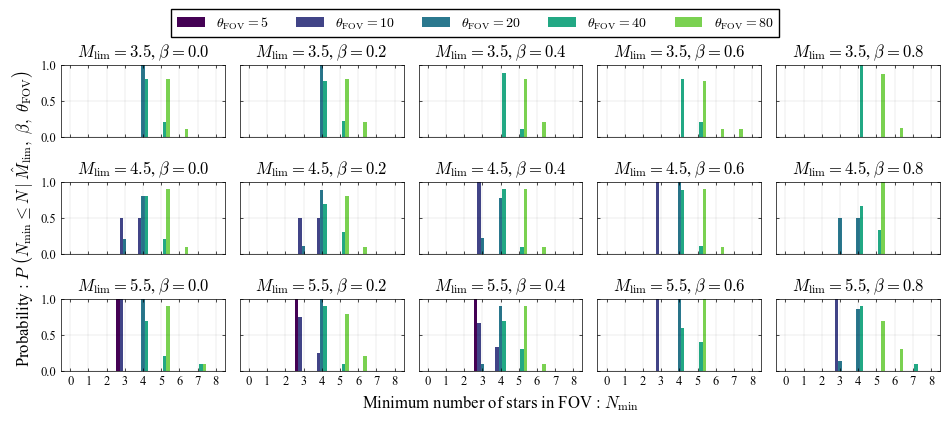

In [30]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Minimum number of stars in FOV : $N_{\\mathrm{min}}$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N_{\\mathrm{min}} \\leq N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(-0.5, 8.5)
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xticks(list(range(0, 9))) 
axes[0, 0].set_xticklabels(list(range(0, 9)))

markers = ["o", "v", "^", "<", ">"]
kwargs = {"ls": "dashed", "lw": 0.5}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = 0 if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(dens))]
        ax.bar(center, dens, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = 0 if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(dens))]
        ax.bar(center, dens, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/matching_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        df = pd.read_csv(path)
        df["match"] = df["unique"]*df["included"]
        df_N_match = df.loc[df["match"], "N_match"]
        # 
        hists = [0]*100
        for N_match in df_N_match:
            hists[N_match] += 1
        dens = []
        for hist in hists:
            den = 0 if len(df_N_match)==0 else hist/(len(df_N_match))
            dens.append(den)
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(dens))]
        ax.bar(center, dens, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_cum_distribution_bar.pdf", bbox_inches='tight')